#### Задача

Напишите скрипт на Python, получающий данные из HTML таблицы с данными по рождаемости в России (ссылка ниже) и визуализируйте их на графике. 

# Чтенеие данных с html страницы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
table = pd.read_html('https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html', skiprows=0)
birthrate = (table[0].rename(columns = table[0].loc[0])
             .drop(0)
             .set_index('Год'))

In [3]:
birthrate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1959 to 2019
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество родившихся чел.  61 non-null     object
dtypes: object(1)
memory usage: 976.0+ bytes


In [4]:
birthrate.head()

,Количество родившихся чел.
Год,
1959,2 796 228
1960,2 782 353
1961,2 662 135
1962,2 482 539
1963,2 331 505


### Вывод

Данные были прочтены и проверены. Тип данных не соответсвует содержанию, нужно избавиться от пробелов и изменить тип данных а численный.

# Предобработка

In [5]:
birthrate['Количество родившихся чел.'] = birthrate['Количество родившихся чел.'].str.replace(' ','').astype(int)

In [6]:
birthrate = birthrate.astype(int)

In [7]:
birthrate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1959 to 2019
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Количество родившихся чел.  61 non-null     int32
dtypes: int32(1)
memory usage: 732.0+ bytes


### Вывод

Предобработка выполненна и данные готовы к визуализации.

# Визуализация данных

c:\users\alexey\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Миллионов человек')

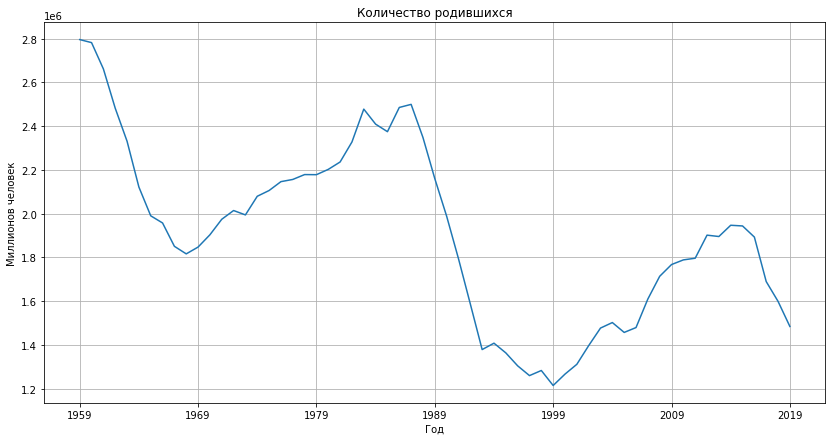

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Количество родившихся')
birthrate['Количество родившихся чел.'].plot(ax=ax, grid=True)
plt.xlabel('Год')
plt.ylabel('Миллионов человек')

## Общие Выводы

Можно наблюдать сильный спад рождаемости году. С 1965 года в СССР начался демографический кризис и на данном графике можно наблюдать, что своего минимума рождаемость достигла в 1999 году. После этого наблюдался рост рождаемости, который был усилен введение материнского капитала в 2007 году. Однако начиная с 2012 года рост сначала замедлился, а затем вообще прекратился и превратился в снижение численности новорожденных.

Таким образом, можно сказать, исходя из графика, что в данный момент наблюдается демографический спад.